# Breast Cancer Machine Learning Project

This project aims to predict whether the cancer tumor is malignant or benign using machine learning models. I used 3 different models (Logistic Regression, Random Forest, ANN) to predict the result. This project's credit goes to HERMES AI Excellence Center in Barcelona for motivating me to finally transform this idea into programs and build a tangible outcome related to AI usage in Healthcare.

# 1. Introduction

Breast cancer, the second most common cancer globally after lung cancer, is by far the most frequent cause of cancer death in women [1]. The best approach to lessen breast tumor passing is to recognize it prior. Early finding requires an exact and solid determination method that enables doctors to recognize breast tumors from dangerous ones without going for surgical biopsy [2]. This project is undertaken to recognize malignant and benign tumors from the given characteristics of breast mass computed from the dataset. Using the Breast Cancer Wisconsin (Diagnostic) Database, we can create a classifier that can help diagnose patients and predict the likelihood of breast cancer [3].

# 2. Project Overview

In order to achieve the goal, the following steps are done:

- Exploratory data analysis
- Preprocess data with feature scaling
- Implement Logistic Regression, Random Forest, and ANN models
- Compare the models with evaluation metrics
- Conclusion & Future Work




## 3. About Dataset
Raw Data can be found on UCI Machine Learning Repository [3].
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 
Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [61]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from scipy import stats
from sklearn import preprocessing
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

## 3.1 Read dataset and first observations

In [62]:
# read dataset 
data_raw = pd.read_csv("data.csv")

In [63]:
# quick look to data
data_raw.shape # (569, 31)
data_raw.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [64]:
# check for a summary
data_raw.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


There are 4 things to take into consideration: 1) There is an id that is not useful for classificaiton 2) Diagnosis is our class label 3) Unnamed: 32 feature that includes NaN and not useful. 4) We do not know what exactly are the other feature names due to their medical concepts. However, with the power of machine learning we can use these features to train our model.

In [74]:
# id column is useless and Unamed: 32 column is empty, so we can drop them
data = data_raw.drop(['Unnamed: 32','id'],axis = 1)


In [65]:
# complete check for missing values 
missing_values=data.isnull().sum()
percent_missing = data.isnull().sum()/data.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
miss=pd.DataFrame(value)
miss

,missing_values,percent_missing %
diagnosis,0,0.0
radius_mean,0,0.0
texture_mean,0,0.0
perimeter_mean,0,0.0
area_mean,0,0.0
smoothness_mean,0,0.0
compactness_mean,0,0.0
concavity_mean,0,0.0
concave points_mean,0,0.0
symmetry_mean,0,0.0


In [75]:
# checking the distribution of Target Varibale (Benign or Malignant)
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [80]:
# remove spaces in columns name
data.columns = data.columns.str.replace(' ','_')

## 4. Exploratory Data Analysis

In order to find about variable distributations in a data set, data vizulization can be helpful. 
Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value. Below the 'radius_mean' variable frequency is shown considering the tumor type. This approach can be deployed for various variables to underestand the dataframe.


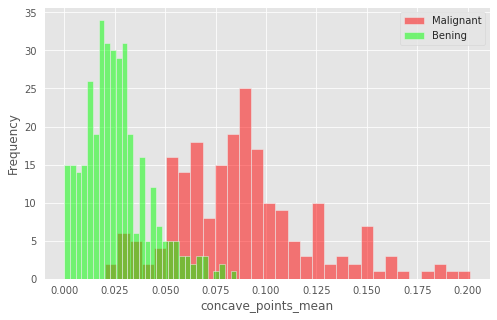

In [82]:
m = plt.hist(data[data["diagnosis"] == "M"].concave_points_mean, bins=30,fc = (1,0,0,0.5), label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].concave_points_mean, bins=30,fc = (0,1,0,0.5), label = "Bening")
plt.legend() 
plt.xlabel("concave_points_mean")
plt.ylabel("Frequency")
plt.show()

In [88]:
# find the most frequent Bening
frequent_b = b[0].max()
index_frequent_b = list(b[0]).index(frequent_b)
most_frequent_b = b[1][index_frequent_b]
print("Most frequent Bening concave_points_mean: ",most_frequent_b)

Most frequent Bening concave_points_mean:  0.017068


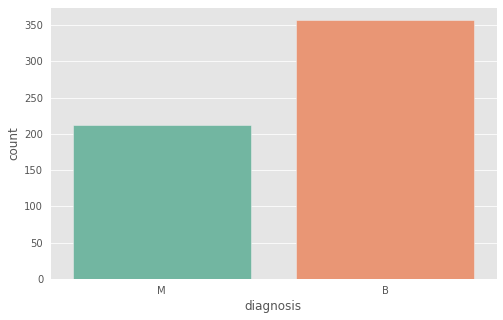

In [91]:
# quick look at the frequency of cancer stages
sns.countplot(data['diagnosis'], palette= 'Set2')

## 5. Data Preprocessing

Mapping categorical values (Diagnosis) to numerical values (Encoding categorical data) to initiate feature selection.


In [92]:
# transforming the diagnosis variable to numeric
le = preprocessing.LabelEncoder()
data.diagnosis = le.fit_transform(data.diagnosis)
data.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## 5.1 Find Correlations
Strength of the relationship between two variables.
Lets look at correlation between all features using a heatmap.

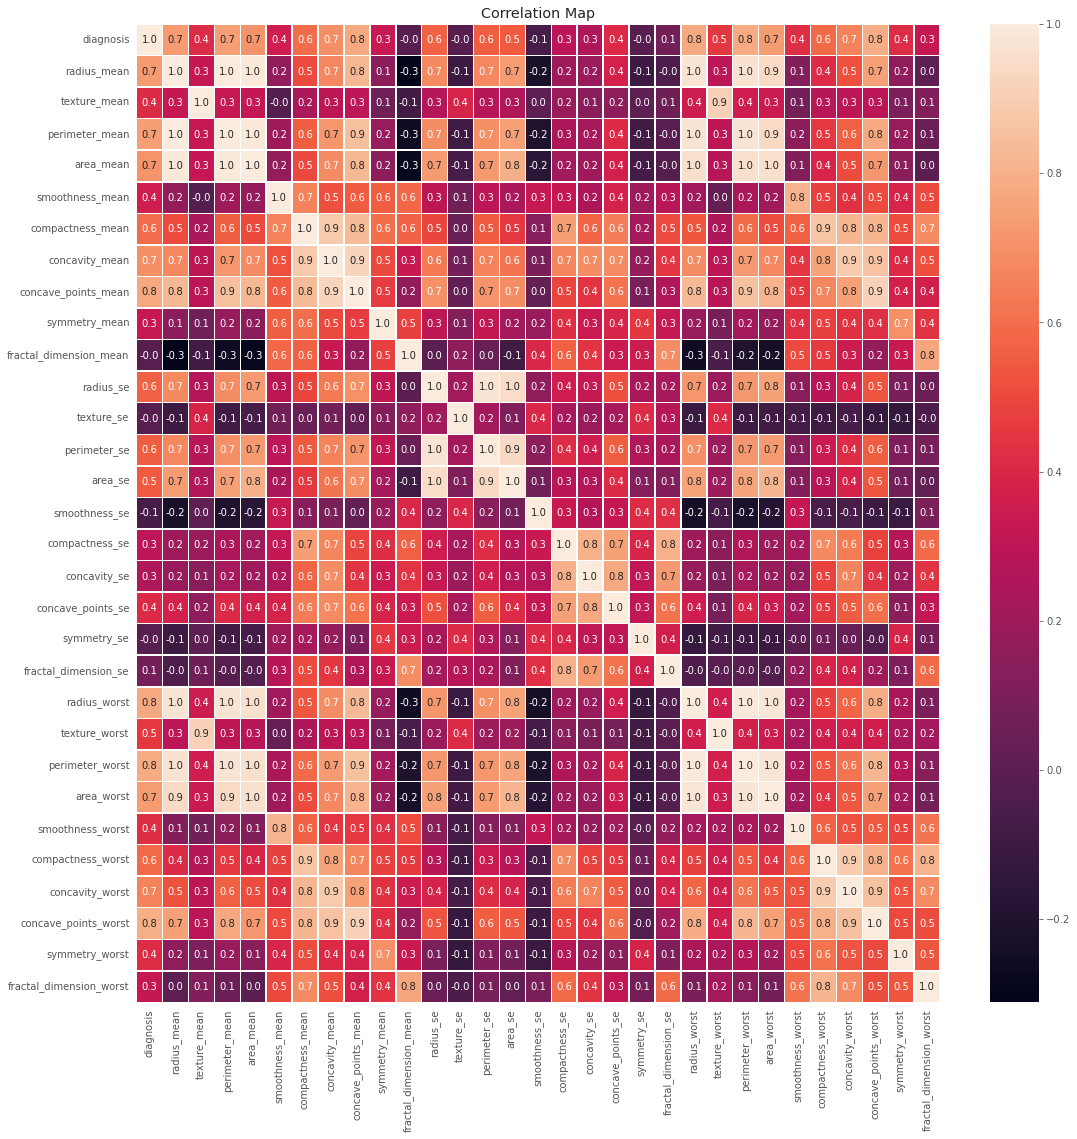

In [94]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.title('Correlation Map')
plt.show()

Heatmap insights: 
- Meaning of 1 is two variable are positively correlated with each other like radius mean and area mean.
- Zero is there is no correlation between variables like radius_mean and fractal dimension_se
- Meaning of negative corrolations is two variables are negatively correlated with each other like radius mean and fractal dimension mean.

These 4 features have more than 0.8 corrolation with the diagnosis:
- concave points_worst
- perimeter_worst
- radius_worst
- concave points_mean

To continue more with finding the corrolations, these 4 variables are illustrated as below.

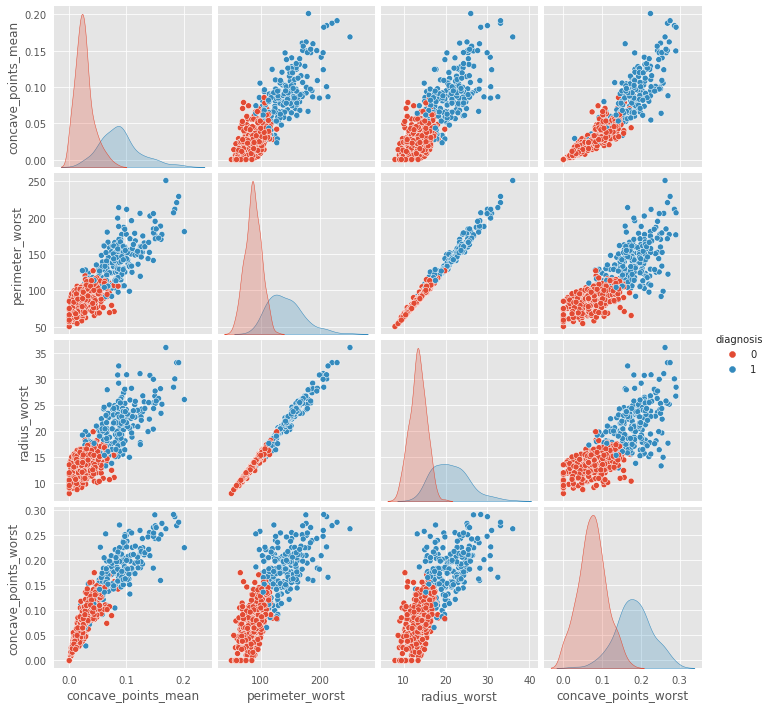

In [99]:
# Feature pairs of highest corrolated variables with diagnosis

cols = ['concave_points_mean', 'perimeter_worst', 'radius_worst', 'concave_points_worst','diagnosis']
sns_plot = sns.pairplot(data=data[cols],hue='diagnosis')

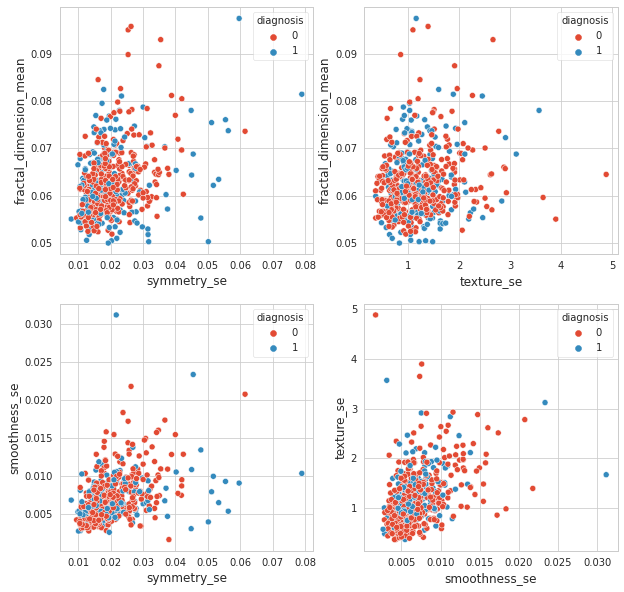

In [106]:
#Negative and zero Correlated Features

fig = plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = data[a], y = data[b], hue = "diagnosis",
                    data = data)
    k+=1

    
plot_scatter('symmetry_se','fractal_dimension_mean',221)
plot_scatter('texture_se','fractal_dimension_mean',222)
plot_scatter('symmetry_se','smoothness_se',223)
plot_scatter('smoothness_se','texture_se',224) 

In [107]:
# last overview of target values distributions
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## 6. Machine Learning Models

Preparing data for model building and checking. 30 percent of data is kept aside for validation purposes. 

In [108]:
# dropin the target variable
x=data.drop('diagnosis',axis=1)
y=data.diagnosis

In [109]:
print(x.shape)
print(y.shape)

(569, 30)
(569,)


In [110]:
# split data to train and test
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [111]:
# Feature Scaling

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 6.1 Logistic Regression

Logistic regression is at the very heart of deep learning. The model fits the logistic function to a dataset in order to predict the probability, given some events that a particular outcome will occur (our case, diagnosis tumor).


In [112]:
model_LS = LogisticRegression()

#Fit the model
model_LS.fit(x_train, y_train)
y_pred = model_LS.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)

print(cm)
print(acc_logreg,'%')

[[106   2]
 [  1  62]]
0.9824561403508771 %


## 6.2 Random Forest Classification

Random forest, an ensemble of decision trees, each of which processes a different, overlapping selection of examples that vote on a final decision. Random forest is less prone to overfitting, which helps make it among the most popular machine learning algorithms.

In [113]:
# Training the RandomForest Classifier on the Training set

rfc = RandomForestClassifier(n_estimators = 50, criterion='entropy', random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [114]:
# Predicting the test set results

y_pred = rfc.predict(x_test)
print(y_pred)

[0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [115]:
# Making the confusion matrix and calculating the accuracy score

cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
print(cm)
print(acc_randomforest)

[[107   1]
 [  4  59]]
0.9707602339181286


## 6.3 Artificial Nueral Networks (ANN)

The idea behind a neural network is clear: For any task, there’s a function that can perform it. A neural network constitutes a trainable function by combining many simple functions, each executed by a single neuron. A neuron’s function is determined by adjustable parameters called weights. Given random values for those weights and examples of inputs and their desired outputs, it’s possible to alter the weights iteratively until the trainable function performs the task at hand.
In this project, tensorflow is used for training the Neural Networks. It is also possible to do it with Pytorch or Keras, same results, different approaches.

In [116]:
# Initialising the ANN

ann = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

# Adding the second hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

# Adding the third hidden layer

ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

# Adding the output layer

ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [117]:
# Training the ANN
# Compiling ANN

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

# Fitting the ANN on the training set

ann.fit(x_train, y_train, batch_size = 16, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7175 - accuracy: 0.5302
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6012 - accuracy: 0.8090
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.9095
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4295 - accuracy: 0.9372
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3442 - accuracy: 0.9548
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2662 - accuracy: 0.9648
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2014 - accuracy: 0.9698
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1538 - accuracy: 0.9724
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1241 - accuracy: 0.9749
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.1055 - accuracy: 0.9774
Epoch 11/

In [120]:
# Predicting the test set results

y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)

In [121]:
# Making the confusion matrix, calculating accuracy_score 

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)

acc_ann = accuracy_score(y_test,y_pred)
print("Accuracy")
print(acc_ann)

Confusion Matrix
[[105   3]
 [  1  62]]
Accuracy
0.9766081871345029


In [122]:
# Models Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'ANN', 'Random Forest'],
    'Score': [acc_logreg, acc_randomforest, acc_ann]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,0.982456
2,Random Forest,0.976608
1,ANN,0.970760


# 7. Conclusion

Breast cancer is the second leading cause of death in women and represents 11% of cancers detected in Spain [4]. Improvements in diagnosis and treatments have increased the survival of these patients so that it is necessary to speed up subsequent recovery and quality of life, which would therefore reduce healthcare costs. 

This project aims to show the use of AI in healthcare. We saw how the machine learning models could predict the type of cancer diagnosis to facilitate the process of early detection. In the end, the models’ accuracy scores were compared, and the highest result, 98%, showed a proper outcome. This type of AI implications would benefit the patients and doctors to start the treatment as soon as possible. 

# 8. Limitations

While this study delivered meaningful insights, it reflects possible limitations. First, since this project primarily focused on using the ML models, knowledge of in-depth medical factors was excluded, which means we excluded diving into understanding each variable. 

The challenges would remain in training and continuous refinement regarding the model development. A trained network is only as good as the data it learned from. For instance, the network’s output will be skewed if the dataset is skewed. If it included only high-resolution pictures of cancer tumors, there is no telling how it would respond to lower-resolution images.

It is also notable that these tools are not intended to be a solitary channel for cancer detection. Instead, they should be employed as a support method for more accurate evidence decision-making.




# 9. Future Work 

To get a better result, we can make our models more accurate by refining them. This can be done by leveraging more feature selection, ignoring the negative correlations, or removing outliers. Also, for each model, there are some considerations; for example, for the ANN, we can add more hidden layers or change the units. 

With different models, more flexibility would be provided. For example, other approaches like support-vector networks (SVN) classifications, decision trees, or K-means clustering could also be helpful to see which one serves our needs.

This type of AI tool has the ability to be accessible 24/7 to serve patients and doctors remotely. With more advanced technologies, they have the potential to guide patients with personalized data to help them find the proper medical care. Recommend the best specialized medical centers and hospitals for their needs.



# 9. References

[1] Dubey, A. K., Gupta, U., & Jain, S. (2016). Analysis of k-means clustering approach on the breast cancer Wisconsin dataset. International journal of computer assisted radiology and surgery, 11(11), 2033-2047.

[2] Sayed, S., Ahmed, S., & Poonia, R. (2017, November). Holo entropy enabled decision tree classifier for breast cancer diagnosis using wisconsin (prognostic) data set. In 2017 7th International Conference on Communication Systems and Network Technologies (CSNT) (pp. 172-176). IEEE.

[3] UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

[4] Leitat Technologies. MICROINMUNOMAMA Project. Financiado por: Ministerio de Ciencia e Innocación-Agencia Estatal de Investigación/Proyecto RTC2019-007402-1


Feel free to reach out!
https://babakbar.github.io/